In [414]:
from ase import Atoms
from gpaw import GPAW, PW, FermiDirac
from gpaw import restart

a = 10.  # Size of unit cell (Angstrom)
c = a / 2 # Center

# Gridpoints for the potential.

atoms = Atoms('H', positions=[(c, c, c)], cell=(a, a, a))

# Defines a GPAW planewave calculator.
# A large cutoff is needed for plotting the potential near the nuclei accurately.
calc = GPAW(mode=PW(750),
            xc='PBE',
            occupations=FermiDirac(0.0, fixmagmom=True),
            txt=None
            )
    
atoms.calc = calc
atoms.get_potential_energy()

potdft = calc.get_electrostatic_potential()
shapedft = np.shape(potdft)

In [457]:
from abtem.potentials import Potential

potiam = Potential(atoms, gpts=shapedft[0], slice_thickness=a/128).build()
shapeiam = np.shape(potiam.array)

projiam = potiam.project()

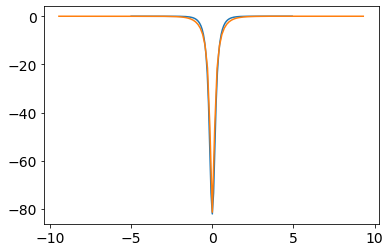

In [478]:
import numpy as np
import matplotlib.pyplot as plt

linedft = potdft[shapedft[0]//2, :, shapedft[1]//2] - np.max(potdft)
lineiam = potiam.array[shapeiam[0]//2, :, shapeiam[1]//2] - np.min(potiam.array)

xdft = np.arange(0,a,a/shapedft[0])-5.0
xiam = np.arange(0,a,a/shapeiam[1])-5.0

plt.plot(xdft,linedft);
plt.plot(xiam / 0.529,-lineiam*4.3);

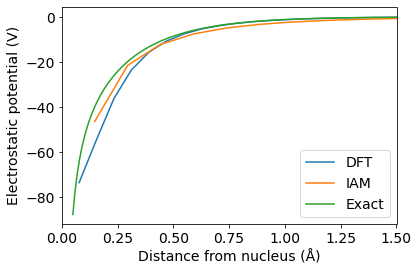

In [487]:
from numpy import pi, exp

a0 = 0.529177;
q = 1.602176*10**-19;
eps0 = 8.854188*10**-12;

mid = np.shape(xdft)[0]//2 + 1

#r = x[mid:]
r = np.arange(0.05,2.0,0.01)
y = -q/(4*pi*eps0)*exp(-2*r/a0)/(r*a0*10**-10) * (0.1 + r/a0)

ax = plt.axes()
ax.set_xlim((0.0,1.5));
plt.plot(xdft[mid:],linedft[mid:], label='DFT');
plt.plot(xiam[mid:]/0.529,-lineiam[mid:]*4.3, label='IAM');
plt.plot(r,y, label='Exact');
plt.legend();
plt.xlabel('Distance from nucleus (Å)')
plt.ylabel('Electrostatic potential (V)')
plt.rcParams['font.size'] = 14